From the job section: Blue-collar has the widest gap between yes and no, 
but that could be due to there being more blue collar workers targeted in the campaign
Management reported the highest yes counts by occupation, but also saw the second 
highest No's too, after blue collar

From housing graph: there were more yes counts amoung people without a housing loan

poutcomes: Most of the data is labeled unknown for the previous marketing outcomes

Age:Most of the data is represented by ages 20 - 40 with the average being 40 but goes 
all the way to 95

It's a little surprising to see that across demographic data and marketing campgain data
there is no trend or consistency, with the exception of age which shows great variety across
the spectrum. Everything else is generally clustered right above zero with extreme outliers
which makes me think there has been a mistake.It looks like someone over 80 with more than 
30,000 Euros opened an account which has skewed almost all the other data.

The duration of the campaign is most correlated to subscribing. However, I can't find 
much correlation with the other features or other relationships.


In [1]:
#Data Wrangling
import numpy as np
import pandas as pd

#Data Viz
import matplotlib.pyplot as plt
import seaborn as sns

#Training & Testing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Model Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv(r"C:\Users\evere\OneDrive\Data\Bank\bank-full.csv", delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df = df.rename(columns = {'y': 'subscribe'})
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [5]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
subscribe    0
dtype: int64

In [6]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
subscribe    object
dtype: object

In [7]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='subscribe', ylabel='count'>

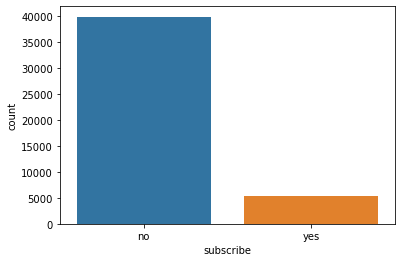

In [8]:
plt.figure(facecolor='w')
sns.countplot(x='subscribe', data=df)

Subscribe refers to how many people opened a monthly deposit account with the bank after it's marketing campgains. From this data we can clearly see that only 5,000 opened an account. 

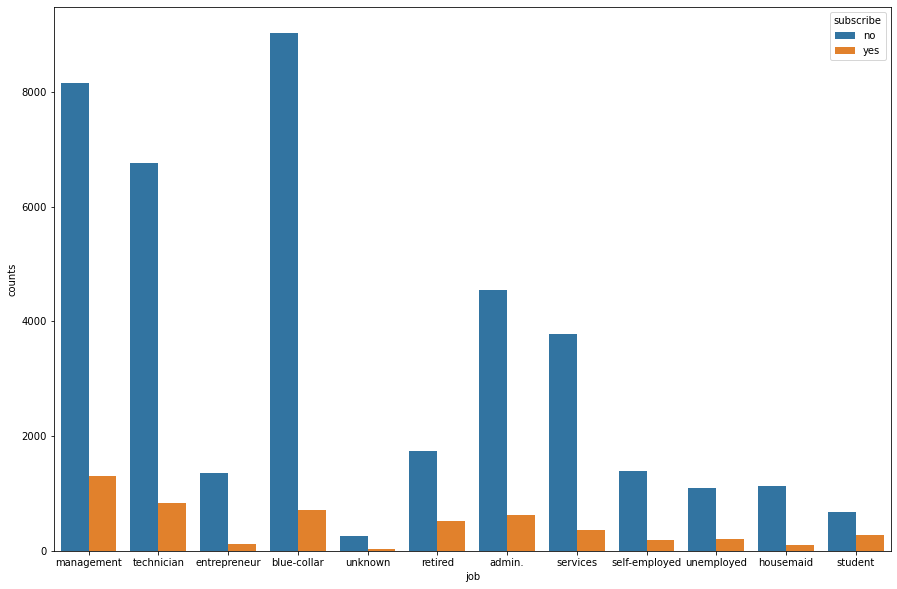

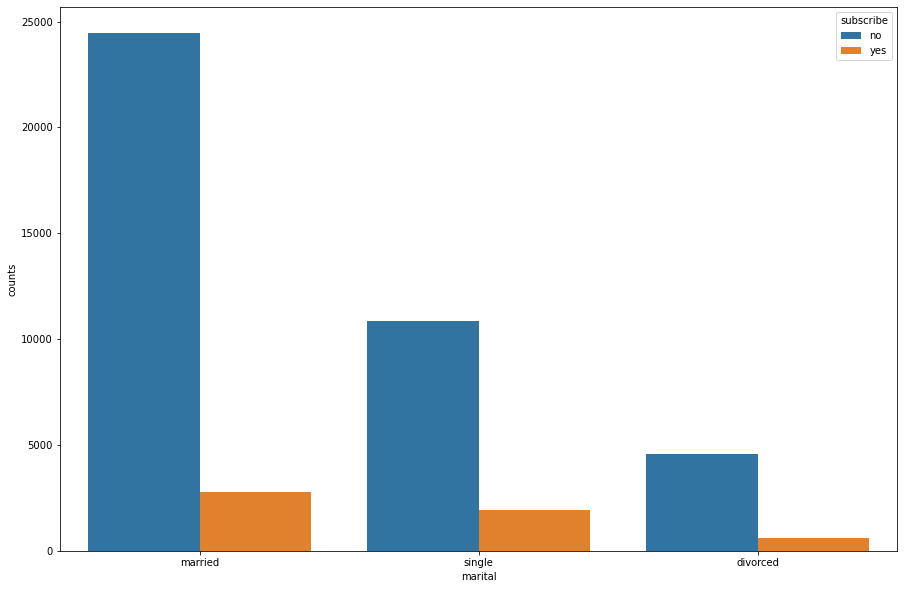

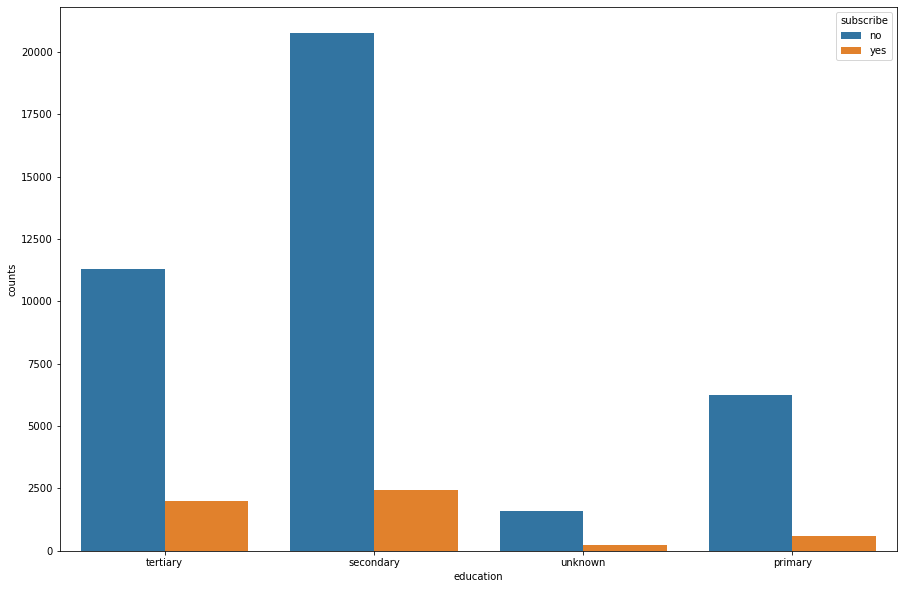

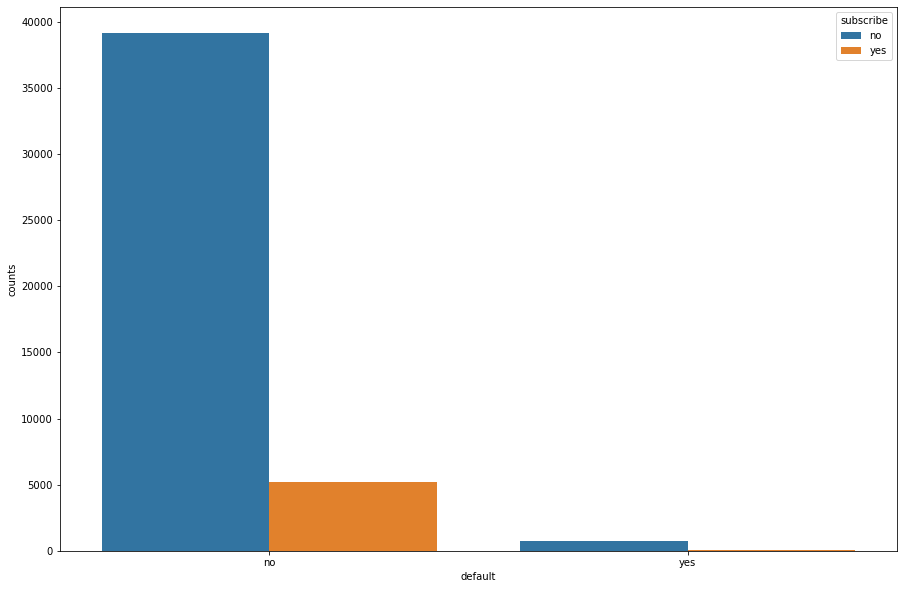

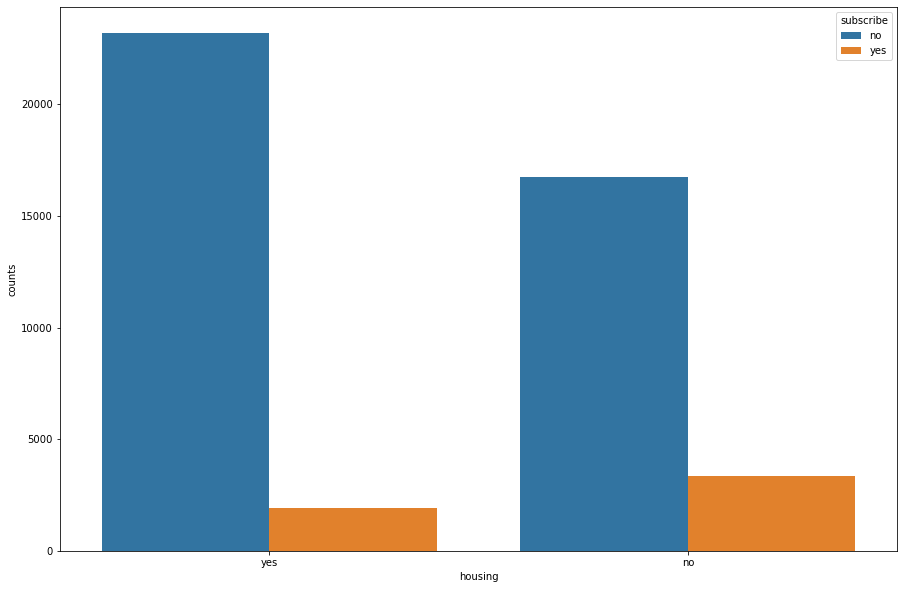

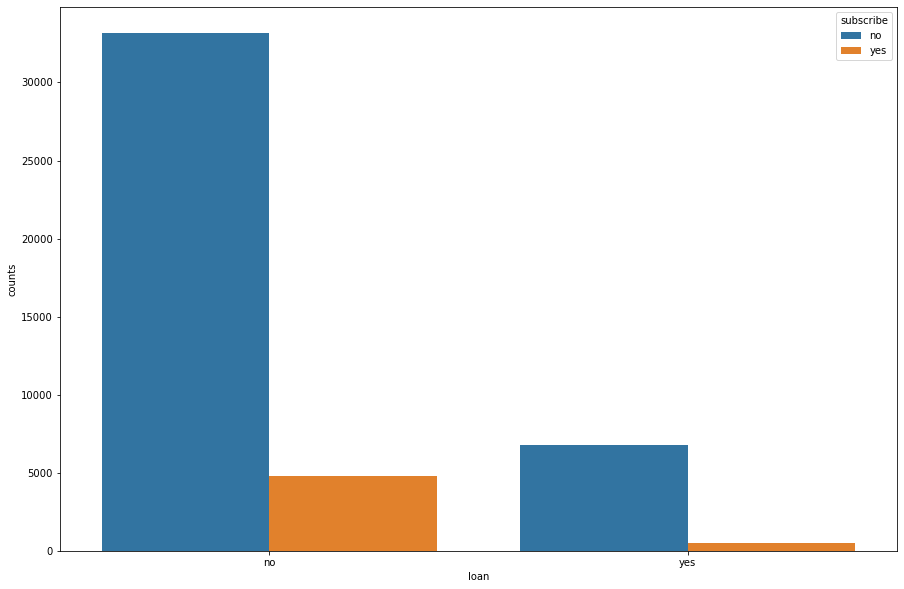

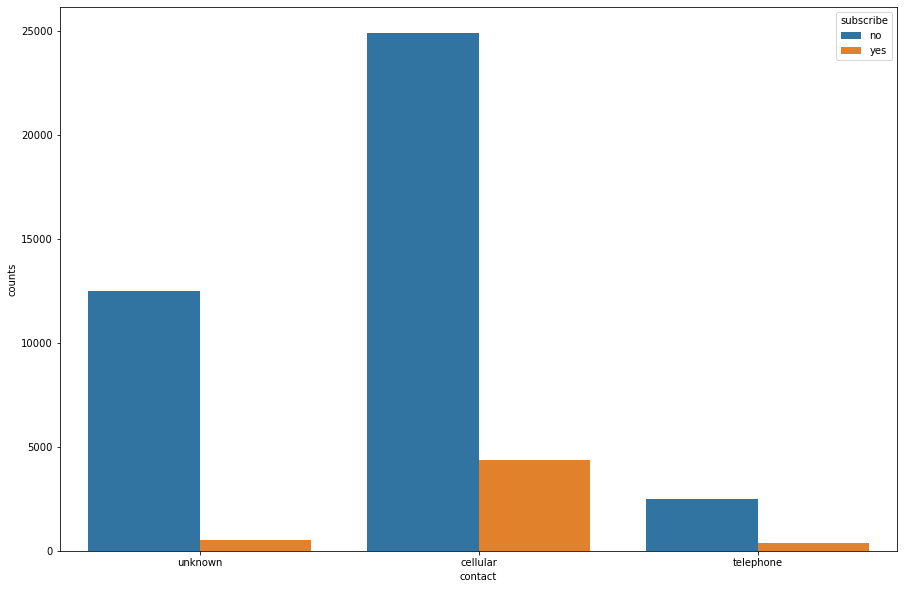

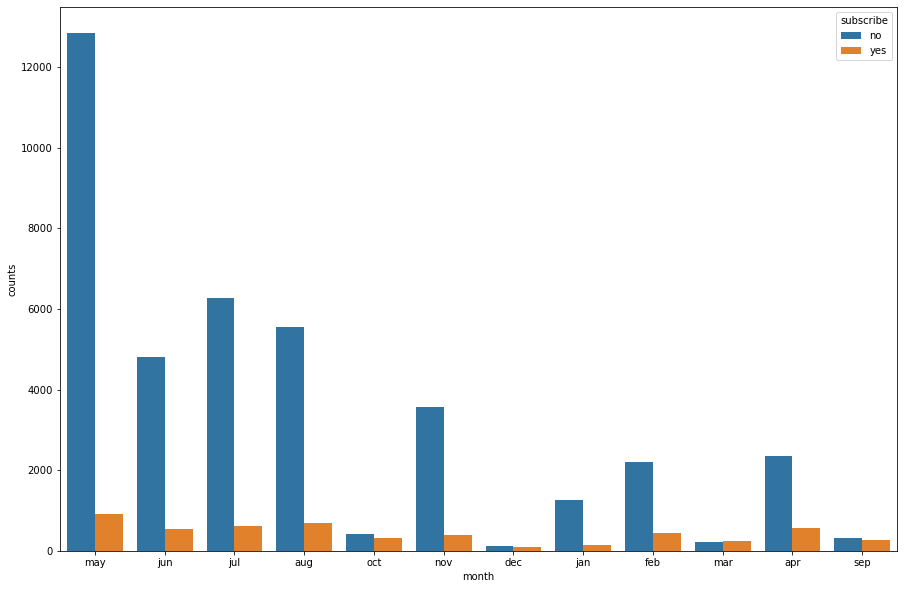

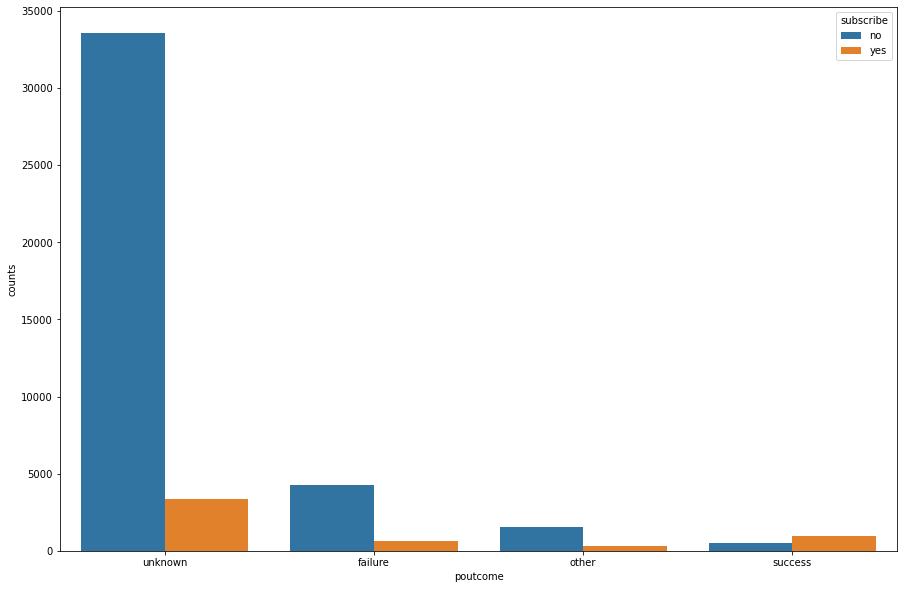

In [9]:
feature = ['job','marital','education','default','housing','loan','contact','month','poutcome']

for i in df[feature]:
    plt.figure(facecolor='w', figsize=(15,10))
    sns.countplot(x=i, hue='subscribe', data=df)
    plt.xlabel(i)
    plt.ylabel('counts')
    plt.show()

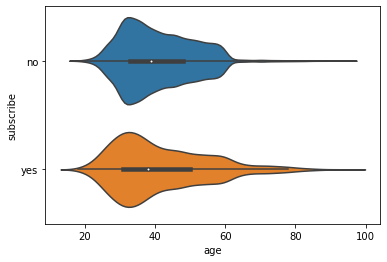

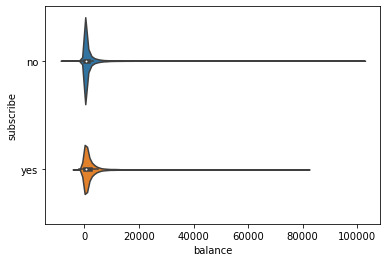

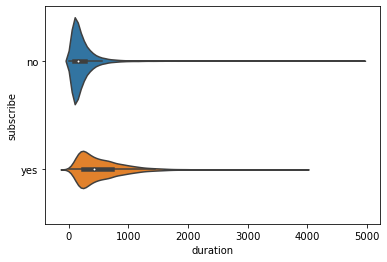

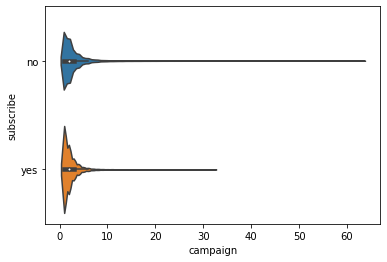

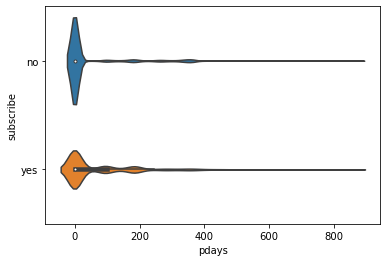

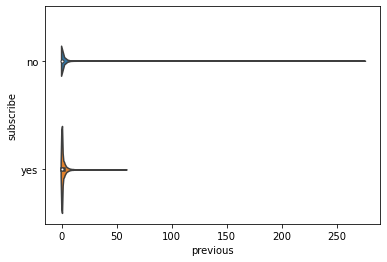

In [10]:
nfeature = ['age','balance','duration','campaign','pdays','previous']

for i in df[nfeature]:
    plt.figure(facecolor='w')
    sns.violinplot(x=i, y='subscribe', data=df)
    plt.xlabel(i)
    plt.ylabel('subscribe')
    plt.show()

<AxesSubplot:xlabel='age', ylabel='balance'>

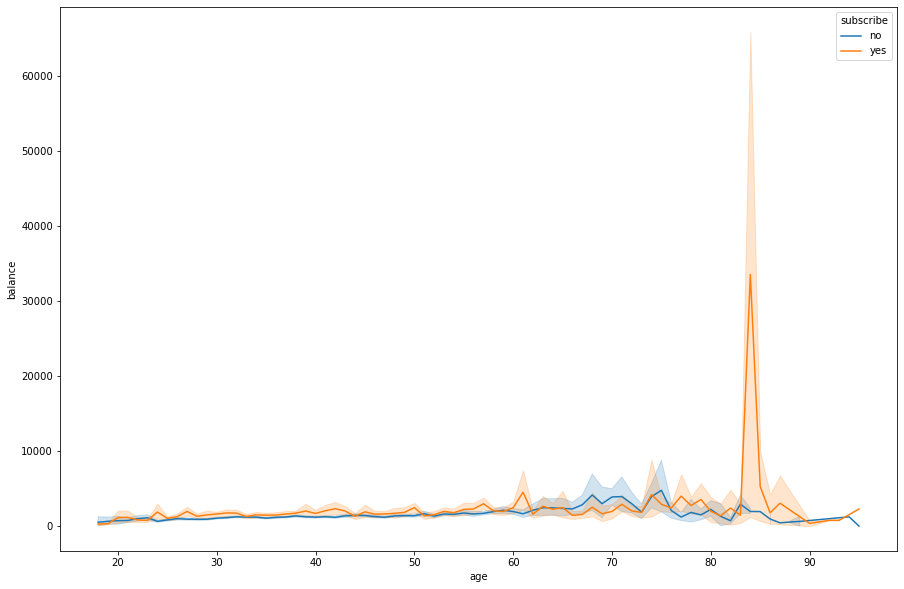

In [11]:
plt.figure(facecolor='w',figsize=(15,10))
sns.lineplot(data=df, x='age', y='balance', hue='subscribe')

<AxesSubplot:xlabel='age', ylabel='duration'>

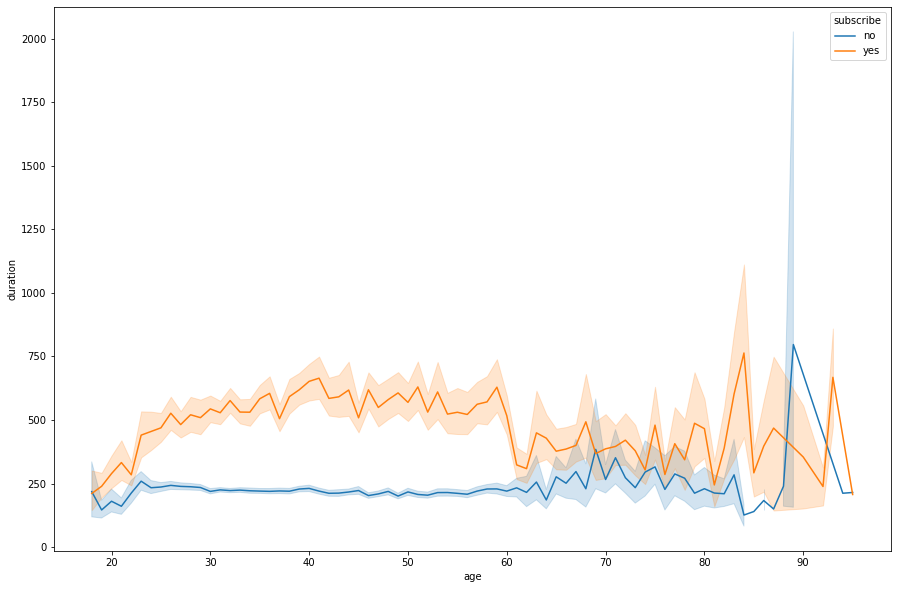

In [12]:
plt.figure(facecolor='w',figsize=(15,10))
sns.lineplot(data=df, x='age', y='duration', hue='subscribe')

<AxesSubplot:xlabel='age', ylabel='campaign'>

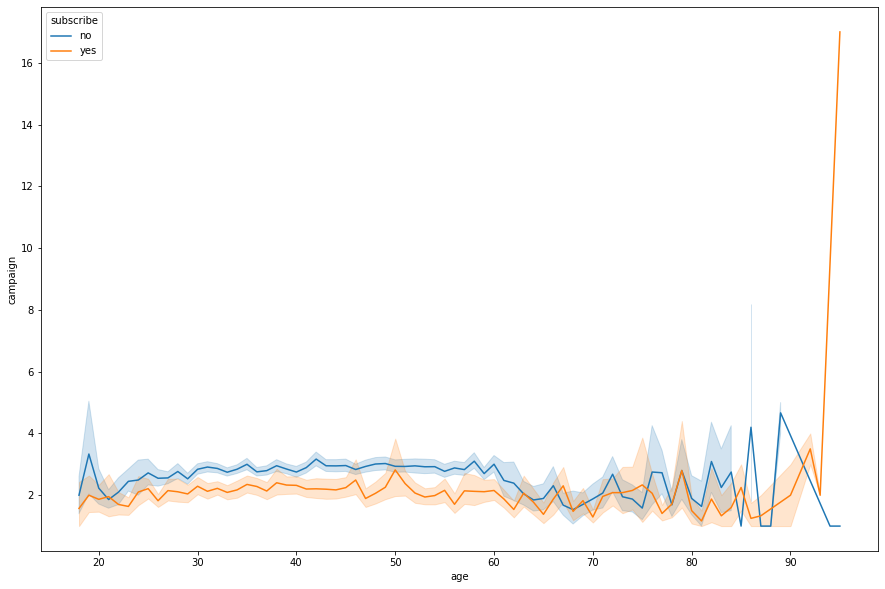

In [13]:
plt.figure(facecolor='w',figsize=(15,10))
sns.lineplot(data=df, x='age', y='campaign', hue='subscribe')

<AxesSubplot:xlabel='age', ylabel='pdays'>

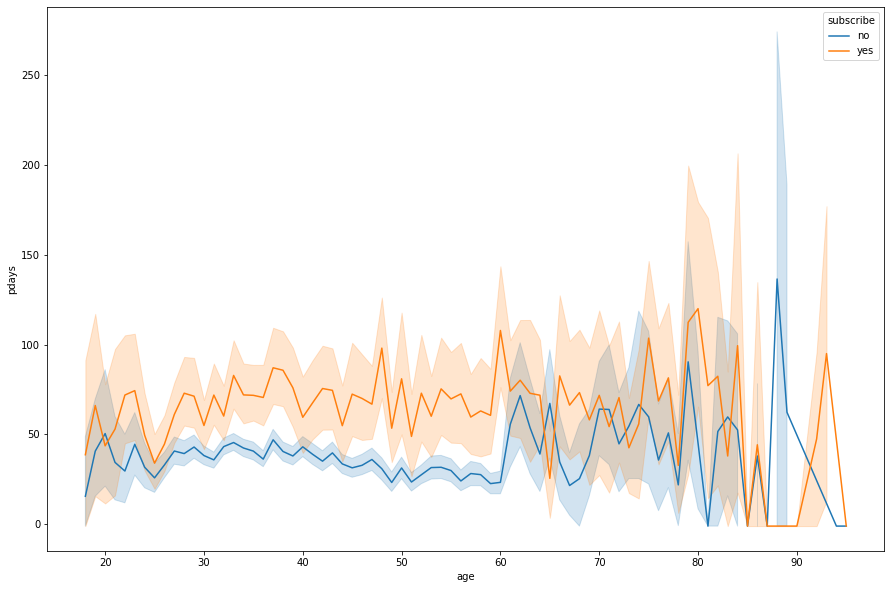

In [14]:
plt.figure(facecolor='w',figsize=(15,10))
sns.lineplot(data=df, x='age', y='pdays', hue='subscribe')

<AxesSubplot:xlabel='age', ylabel='previous'>

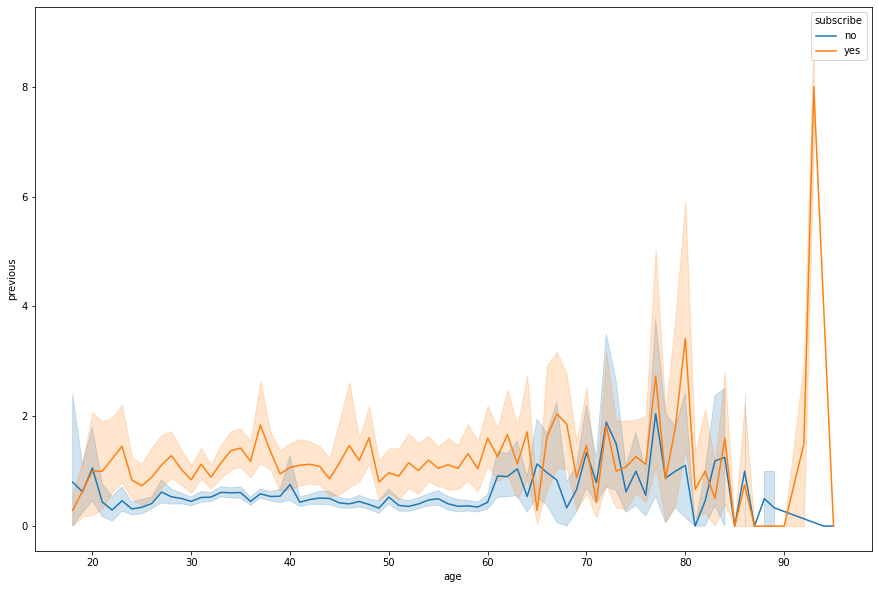

In [15]:
plt.figure(facecolor='w',figsize=(15,10))
sns.lineplot(data=df, x='age', y='previous', hue='subscribe')

<AxesSubplot:xlabel='duration', ylabel='pdays'>

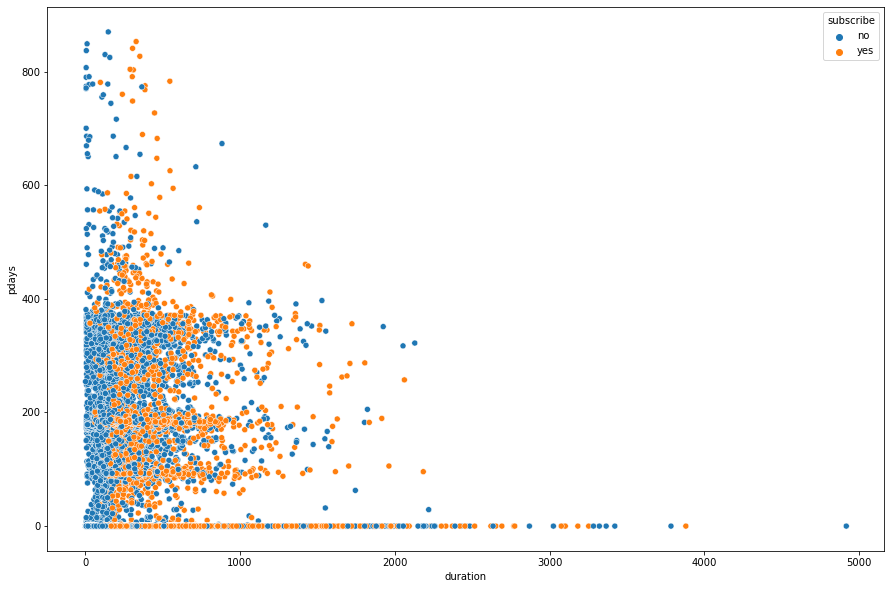

In [16]:
plt.figure(facecolor='w',figsize=(15,10))
sns.scatterplot(data=df, x='duration', y='pdays', hue='subscribe')

In [17]:
from sklearn.preprocessing import LabelEncoder

labelencoder=LabelEncoder()

for i in df[feature]:
    df[i] = labelencoder.fit_transform(df[i])
    
df['subscribe'] = labelencoder.fit_transform(df['subscribe'])

df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribe
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


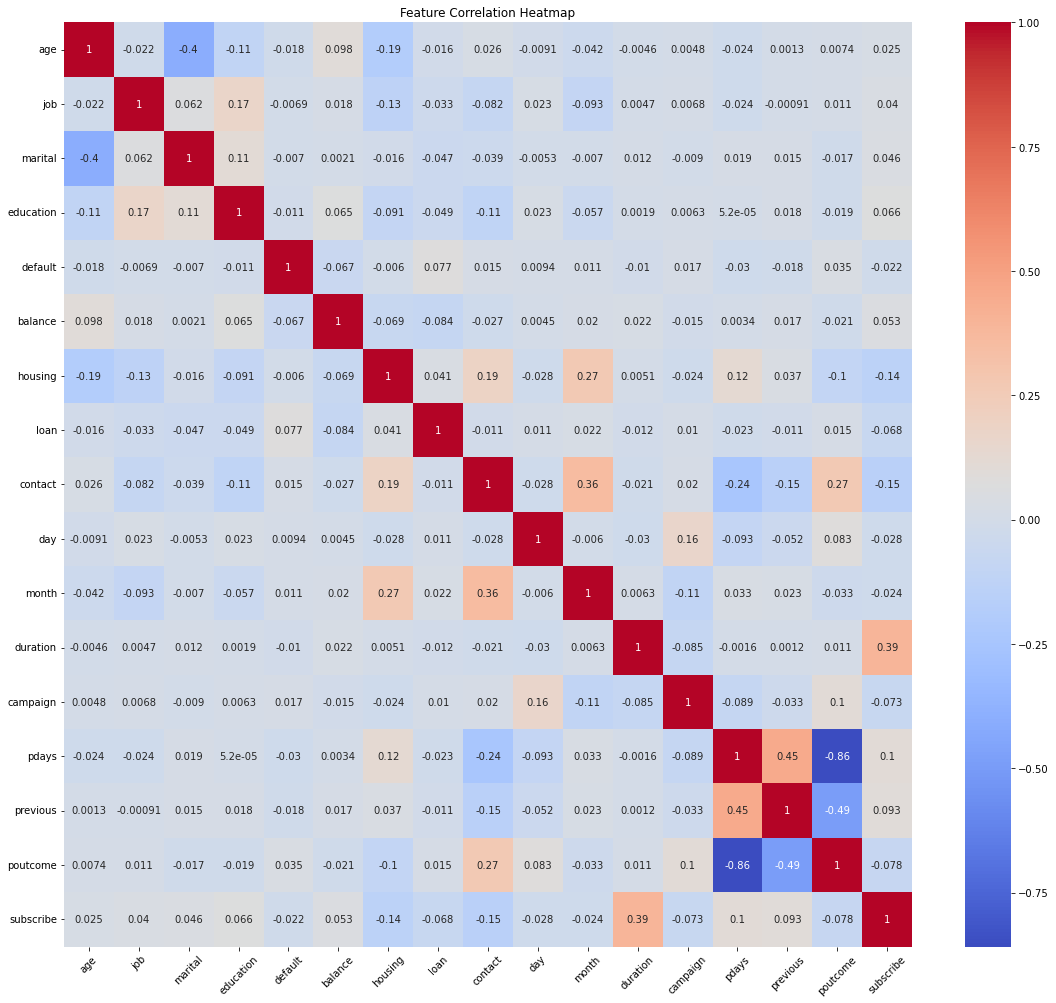

In [18]:
corr = df.corr()

plt.figure(figsize=(19,17),facecolor='w')
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.show()